In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Randomly select a subset of 5 features
np.random.seed(42)  # Seed for reproducibility
selected_features = np.random.choice(X.shape[1], 8, replace=False)
X_subset = X[:, selected_features]

# Split the subset data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Train the Linear Regression model on the subset of features
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Selected Features:", selected_features)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Coefficients:", model.coef_)


Selected Features: [8 1 5 0 7 2 9 4]
Mean Squared Error (MSE): 2901.7690043971716
R² Score: 0.4523054185434343
Coefficients: [ 712.63219016 -185.8465701   325.46171615   94.81440451  109.37537491
  640.5442494   107.60807592 -625.7410935 ]


In [ ]:
import numpy as np

# Add a bias term (column of ones)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Compute weights using the normal equation
weights = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Predict on test set
y_pred = X_test_bias @ weights

# Calculate MSE and R^2 score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2 Score:", r2)
print("Linear Regression Weights (excluding bias):", weights[1:])

MSE: 2900.1936284934795
R^2 Score: 0.4526027629719198
Linear Regression Weights (excluding bias): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [ ]:
from sklearn.linear_model import Lasso

# Train Lasso model
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
lasso_weights = lasso_model.coef_

print("Lasso MSE:", mse_lasso)
print("Lasso R^2 Score:", r2_lasso)
print("Lasso Weights:", lasso_weights)


Lasso MSE: 2945.148879042492
Lasso R^2 Score: 0.44411768125231843
Lasso Weights: [  0.          -0.         513.5874669  165.4975634   -0.
  -0.         -72.68339144   0.         354.65010136   0.        ]


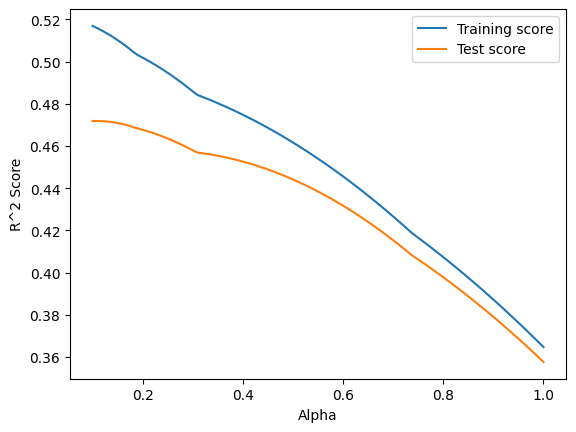

In [ ]:
alphas = np.linspace(0.1, 1, 100)
train_scores = []
test_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    train_scores.append(lasso_model.score(X_train, y_train))
    test_scores.append(lasso_model.score(X_test, y_test))

# Plot the results
import matplotlib.pyplot as plt

plt.plot(alphas, train_scores, label="Training score")
plt.plot(alphas, test_scores, label="Test score")
plt.xlabel("Alpha")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()
